# Deep Hedging

The lecture is devoted to pricing and hedging from a machine learning perspective. First we develop some basic tools from mathematical finance and learn to understand pricing and hedging as questions from convex analysis. Then we consider several machine learning views on it.

## Basic principles of pricing and hedging

We shall first go through basic principles of modeling in mathematical Finance.

To model financial market we shall consider a probability space $ (\Omega,\mathcal{F},P) $ together with a filtration $ (\mathcal{F}_t) $.

We shall denote by $ S^i $ the price of asset $i$ and by $ H^i $ the holdings in asset $i$ (can be any real number here, no market frictions assumed). $ H^i_t $ is fully determined at time $ t- 1 $ with all the information available there.

First we learn to write portfolio values, i.e. $ V_t = \sum_{i=0}^d H^i_tS^i_t $ as P & L processes in case the portfolio is self-financing. Self-financing means that
$$
\sum_{i=0}^d H^i_{t+1}S^i_t = \sum_{i=0}^d H^i_tS^i_t \, ,
$$
which in turn leads to
$$
V_{t+1} - V_t = \sum_{i=0}^d H^i_{t+1} (S^i_{t+1} - S^i_{t}) \, .
$$
This means that the change in value of the portfolio comes from the change in value of the prices and nothing else.

This formula allows for a simplification. If we divide everything by the value of $S^0$, the price of the $0$-th asset, then in the above sum one term vanishes. We denote $ X^i_t = S^i_t/S^0_t $
When discounted, e.g. by $S^0$, this means
$$
\frac{V_t}{S^0_t} - \frac{V_0}{S^0_0} = (H \bullet X)_t = \sum_{s \leq t} \sum_{i=1}^d H^i_{t+1} (X^i_{s+1} - X^i_{s})\, .
$$
Notice that the inner sum only starts at $1$ because $ X^0_t = 1 $.

The right hand side is a P & L process. The argument can be turned around: given a portfolio value which is given by a constant plus a P & L process, then we can of course construct a self-financing portfolio.

We can ask whether arbitrages are possible and under which conditions (for which price) payoffs can be dominated (super-hedged) by self-financing portfolios.

### A model is free of arbitrage if there is no self-financing portfolio which starts at zero and has a positive outcome

This leads us the valuation problem: what is the value of a payoff $f$ at time $T$? We can answer that by constructing appropriate (super-)hedging portfolios. Superhedging just means "dominating".

Let us consider this question in a one period case, i.e. $T=1$. The states of the world are denoted by $\omega$, hence we are interested in the question to find the smallest $ x $ such that for all $ \omega $
$$
f(\omega) \leq x + \sum_{i=1}^d H_0^i (X^i_1(\omega)-X^i_0(\omega)) \, .
$$
This is equivalent to characterize the cone $ C:= \{ (H \bullet X)_1 - g \text{ for all possible strategies } H \text{ and } g \geq 0\} $.

This is a geometric question: the solution is $ C = \{ e \text{ such that } E_Q[e] \leq 0 \text{ for all equivalent martingale measures } $Q$\} $. This yields the beautiful formula
$$
\sup_{Q \in \mathcal{M}} E_Q[f] = \inf \{x \text{ such that there is a strategy } H \text{ with } f \leq x + (H \bullet X)_1 \} \, .
$$
The set $\mathcal{M} $ is the set of equivalent martingale measures. A super-hedging portfolio is a self-financing portfolio (i.e. the value process is the initial value of the portfolio plus the P&L process -- all in discounted terms) dominating a certain payoff.

We have seen in one step bi- and tri-nomial models that pricing and hedging are in a fundamental duality relationship given a certain payoff: the largest arbitrage free price equals the smallest price of a super-hedging portfolio. Superhedging prices can be calculated by backwards induction.

### This yields the following pricing formula: if a payoff's contract is liquidly traded at price $ \pi_t(f) $ at intermediate times $ t $, then there exists an equivalent martingale measure for the given market constituted by $X^1,\dots,X^d$ such that
$$
E_Q\big[ \frac{f}{S^0_T} | \mathcal{F}_t \big] = \frac{\pi_t(f)}{S^0_t} .
$$
Let us consider these principles in the following modeling situations. Furthermore models are free of arbitrage if and only if there exists an equivalent pricing measure, which associates in particular to P & L processes the value $0$. Whence prices of payoffs can be calculated by taking expectations (i.e. a Monte Carlo evaluation is possible) with respect to this equivalent pricing measure.

First we draw the tree in undiscounted terms in the format time / numeraire / stock price. For simplicity we take the numeraire equal to $1$ but one can easily adapt that. Next the draw the tree in discounted terms in the format time / price. 

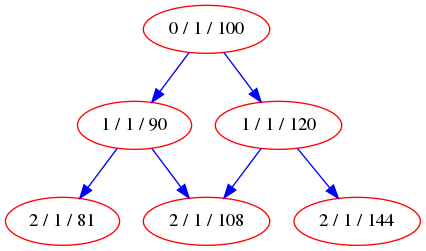

In [1]:
import numpy as np
from itertools import product


# EUROPEAN
S0 = 100.
u  = 1.2
d  = 0.9
payoffE = lambda S: np.maximum(S-S0,0.)

timesteps = 2
bin = set((0,1))
trajectories = set(product(bin, repeat = timesteps))


import pygraphviz as PG
from IPython.display import Image
binomialtreeforward = PG.AGraph(directed=True, strict=True)
binomialtreeforward.edge_attr.update(len='2.0',color='blue')
binomialtreeforward.node_attr.update(color='red')
binomialtreeforwarddiscounted = PG.AGraph(directed=True, strict=True)
binomialtreeforwarddiscounted.edge_attr.update(len='2.0',color='blue')
binomialtreeforwarddiscounted.node_attr.update(color='red')
binomialtreebackward = PG.AGraph(directed=True, strict=True)
binomialtreebackward.edge_attr.update(len='2.0',color='blue')
binomialtreebackward.node_attr.update(color='red')
process = {(omega,0):S0 for omega in trajectories}
numeraire = {(omega,0):1. for omega in trajectories}
discountedprocess = {(omega,0):S0 for omega in trajectories}

#construct process by forward steps
for time in range(1,timesteps+1):
    for omega in trajectories:
        shelper = process[(omega,time-1)]*u**(omega[time-1])*d**(1.-omega[time-1])
        process.update({(omega,time):shelper})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        #shelper = process[(omega,time-1)]*u**(omega[time-1])*d**(1.-omega[time-1])
        numeraire.update({(omega,time):1.0})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreeforward.add_edge('%d / %d / %d'% (time-1,numeraire[(omega,time-1)],process[(omega,time-1)]),
                                     '%d / %d / %d'% (time,numeraire[(omega,time)],process[(omega,time)]))

#for time in range(1,timesteps+1):
#    for omega in trajectories:
#        binomialtreeforward.add_edge('%d, %d'% (time-1,numeraire[(omega,time-1)]),'%d, %d'% (time,numeraire[(omega,time)]))

Image(binomialtreeforward.draw(format='png',prog='dot')) 

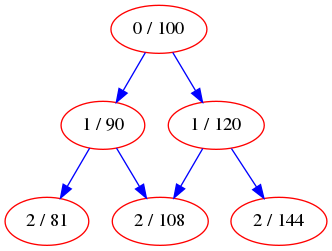

In [2]:
for time in range(0,timesteps+1):
    for omega in trajectories:
        shelper = process[(omega,time)]/numeraire[(omega,time)]
        discountedprocess.update({(omega,time):shelper})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreeforwarddiscounted.add_edge('%d / %d'% (time-1,discountedprocess[(omega,time-1)]),'%d / %d'% (time,discountedprocess[(omega,time)]))

#for time in range(1,timesteps+1):
#    for omega in trajectories:
#        binomialtreeforward.add_edge('%d, %d'% (time-1,numeraire[(omega,time-1)]),'%d, %d'% (time,numeraire[(omega,time)]))


Image(binomialtreeforwarddiscounted.draw(format='png',prog='dot')) 

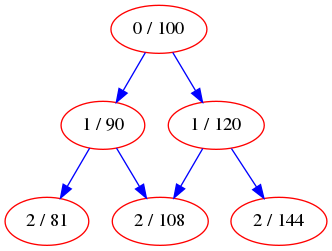

In [3]:
for time in range(0,timesteps+1):
    for omega in trajectories:
        shelper = process[(omega,time)]/numeraire[(omega,time)]
        discountedprocess.update({(omega,time):shelper})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreeforwarddiscounted.add_edge('%d / %d'% (time-1,discountedprocess[(omega,time-1)]),'%d / %d'% (time,discountedprocess[(omega,time)]))

#for time in range(1,timesteps+1):
#    for omega in trajectories:
#        binomialtreeforward.add_edge('%d, %d'% (time-1,numeraire[(omega,time-1)]),'%d, %d'% (time,numeraire[(omega,time)]))


Image(binomialtreeforwarddiscounted.draw(format='png',prog='dot')) 

In [4]:
def condprob(omega,time): 
    omegahelperu = list(omega)
    omegahelperd = list(omega)
    omegahelperu[time]=1
    omegahelperd[time]=0
    omegahelperu = tuple(omegahelperu)
    omegahelperd = tuple(omegahelperd)
    return (discountedprocess[(omega,time)]-discountedprocess[(omegahelperd,time+1)])/(discountedprocess[(omegahelperu,time+1)]-discountedprocess[(omegahelperd,time+1)])

The previous function calculates the conditional probabilities which make the process at each node a martingale. Finally the price of a Eurpean Call payoff is calculated in a backwards manner. The tree is drawn in the format time / stock price / derivative price.

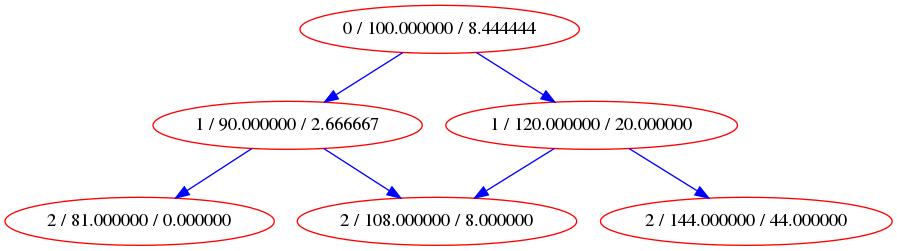

In [5]:
processbackward = {(omega,timesteps):(payoffE(process[(omega,timesteps)])/numeraire[(omega,timesteps)]) for omega in trajectories}
#backwardssteps: European
for time in reversed(range(0,timesteps)):
    for omega in trajectories:
        shelper=0                                   
        omegahelperu = list(omega)
        omegahelperd = list(omega)
        omegahelperu[time]=1
        omegahelperd[time]=0
        omegahelperu = tuple(omegahelperu)
        omegahelperd = tuple(omegahelperd)
        shelper = processbackward[(omegahelperu,time+1)]*condprob(omega,time)+processbackward[(omegahelperd,time+1)]*(1-condprob(omega,time))
        processbackward.update({(omega,time):shelper})

for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreebackward.add_edge('%d / %f / %f'% (time-1,discountedprocess[(omega,time-1)],processbackward[(omega,time-1)]),'%d / %f / %f'% (time,discountedprocess[(omega,time)],processbackward[(omega,time)]))

Image(binomialtreebackward.draw(format='png',prog='dot'))       

## Deep Hedging

In the sequel we construct deep hedges in a high dimensional frictionless market. In principle also transaction costs can be easily added, however, one should change the loss function appropriately.

The code is based on great work of my master student Michael Giegrich, whose work is based on the paper [Deep Hedging](https://arxiv.org/abs/1802.03042) by Hans B&uuml;hler, Lukas Gonon, Josef Teichmann and Ben Wood.

First a parameter class is defined and several functions needed in the sequel. Then - in tensorflow - a feedforward network with two hidden layers is defined for every time step $ i $ and for every asset $ S^i $ where we need a hedging strategy: Input is the price at time $ i $ _and_ the strategy at time $ i - 1 $, which is due to transaction costs on the one hand or can be seen as way to account for memory effects on the other hand. Be aware that the $L^2$ distance to measure the quality of the hedge is not appropriate in case of transaction costs.

The loss function is given by
$$
E_Q\Big[{\big( Y - (\delta \bullet S) - p \big)}^2\Big]
$$
where $ Y $ denotes a payoff, $ \delta $ the strategies to be learnt and $ p $ the price to be learned. $Q$ is an a priori chosen martingale measure.

For reasons of illustration we actually use correlated Black-Scholes models to generate prices and we use call options on a certain amount of most relevant assets. This allows to easily write down a Black-Scholes hedge.

Let us recall briefly the Black-Scholes theory: we consider $ d = 1 $, a bank account process $ S^0 = 1 $, and
$$
S_t = S_0 \exp(\sigma W_t + \mu t)
$$
for $ t \in [0,T] $. $ W $ denotes a Wiener process. $ \sigma > 0 $ is called the volatility and $ \mu $ the drift.

We ask whether we can write a given payoff profile $ f(S_T) $ as a premium plus a hedging portfolio
$$
f(S_T) = x + (H \bullet S)_T \,
$$
This formula holds with respect to the physical measure but also any other equivalent measure (if it holds true!), hence we can solve it with respect to martingale measure $ Q \sim P $.

The idea to construct the hedging strategy $ H $ comes from Ito's formula. Consider a $C^2$ function $ v $ on $ [0,T] \times \mathbb{R}_{> 0} $ with $ v(0,S) = f(S) $, then Ito's formula yields
$$
v(T-t,S_t) = v(T,S_0) = ( \partial_S v(T-.,S) \bullet S)_t + ( (- \partial_t + \frac{\sigma^2 S^2}{2} \partial^2_S)v(T-.,S) \bullet S)_t \, .
$$
If we $ v $ satisfies the Black-Scholes PDE
$$
\partial_t v(t,S) = \frac{\sigma^2 S^2}{2} \partial^2_Sv(t,S)
$$
for $ t in [0,T] $ and $ S > 0 $, we obtain the hedging strategy as so called Delta $ H_t = \partial v(T-t,S_t) $ and the premium $ x = v(T,S_0) $.

This PDE can be solved explicitly by calculating
$$
v(T-t,S_t) = E\big[f(\exp(\sigma W_T - \frac{\sigma^2T}{2}))|S_t\big] \,
$$
which yields for $ f(S):=(S-K)_+ $ the famous Black-Scholes formula
$$
v(u,S) = E((S\exp(\sigma W_u - \sigma^2/2) - K)_+)= S \Phi(\frac{\log(\frac{S}{K}) + \frac{\sigma^2u}{2}}{\sigma \sqrt{u}}) - K \Phi\Big(\frac{\log(\frac{S}{K} \Big) -\frac{\sigma^2u}{2}}{\sigma \sqrt{u}} \Big) \, .
$$

In [6]:
# by Michael Giegrich and Josef Teichmann

import os
import time
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

# Set Parameters
np.random.seed(2)
tf.set_random_seed(2)
global_step = tf.Variable(0, trainable=False)
t0 = time.time()
epsilon = 0.
class parameters():
    def __init__(self):
        self.NUM_EPOCHS = 40
        self.TIME_STEPS = 30
        self.NUM_ASSETS = 1#50
        self.NUM_RELAVENT = 1 
        self.NUM_SAMPLES = 500000
        self.BATCH_SIZE = 258
        self.NUM_BATCHES = self.NUM_SAMPLES // self.BATCH_SIZE
        self.hidden_dim1 = 2*self.NUM_ASSETS
        self.hidden_dim2 = 2*self.NUM_ASSETS
        self.LEARNING_RATE = 0.0005
        self.NUM_TEST = 10000
        self.training = 1
        self.decay = 0.999
        self.minimal_loss = 100.0 #Determines if model is saved
        self.NUM_VALIDATION = 10000
        self.L1_LAMBDA = 0.001 #Parameter for L1-Penalty
        self.correlated = True
        self.corr = 1


/usr/lib64/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
#############################################
# Generates Model Hedge And Price For Calls #
#############################################
def delta_BS(S, sigma = 0.2, K = 100., r = 0., T =30./365.):
    delta_hedge = []
    time_steps = int(T*365)
    for i in range(time_steps-1):
        i_ratio = float(i)/365.
        delta = (ss.norm.cdf((np.log(S[:,i]/K) +(r+sigma**2/2)*(T-i_ratio))/(sigma*np.sqrt(T-i_ratio))))
        delta_hedge.append(delta)
    delta_hedge = np.stack(delta_hedge, axis=1)
    return delta_hedge
def d1(S0, K, r, sigma, T):
    return (np.log(S0/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T)) 
def d2(S0, K, r, sigma, T):
    return (np.log(S0 / K) + (r -sigma**2 / 2) * T) / (sigma * np.sqrt(T)) 
def BlackScholes(S0, sigma = 0.2, K = 100., r = 0., T =30./365.):
    return (S0 * ss.norm.cdf(d1(S0, K, r, sigma, T)) - K * np.exp(-r * T)* ss.norm.cdf(d2(S0, K, r, sigma, T)))

In [8]:
import math as m

####################
# Generate Samples #
####################
def SampleGenerator(NumOfAssets ,corr, NumOfRelevant = 5,InitPrice =  100, rf_rate = 0., dt = 1./365.,TimeSteps = 30, sigma = 0.2, K = 100.):
    S0 = np.ones(NumOfAssets)*InitPrice
    features = np.zeros((TimeSteps, NumOfAssets))
    L = np.linalg.cholesky(corr)
    features[0, 0:NumOfAssets] = 0.
    features[1, 0:NumOfAssets] = S0
    for i in range(2, TimeSteps):
        W = m.sqrt(dt)*np.dot(L,np.random.randn(NumOfAssets))
        features[i, 0:NumOfAssets] =(features[i-1, 0:NumOfAssets]*np.exp((rf_rate*np.ones(NumOfAssets)-0.5*sigma*sigma)*dt+sigma*W)) 
    FinalPrices = features[TimeSteps-1, 0:NumOfRelevant]
    value = np.maximum(FinalPrices - K, 0)  
    value = np.sum(value)
    return features, value

###############################
# Generate Correlation Matrix #
###############################
def corr(NumOfAssets):
    dim = NumOfAssets
    A = np.random.normal(3, 8,size=(dim,dim))
    cov = np.dot(A,np.transpose(A))
    D = np.identity(dim)/np.sqrt(np.diag(cov))
    corr = np.dot(D,np.dot(cov,D))
    return corr 

#################
# Generate Data #
#################
def DataGenerator(NumOfSamples, TimeSteps = 30,NumOfAssets = 50, corr = 1, correlated = False,NumOfRelevant = 5):
    if not(correlated): 
        corr = np.eye(NumOfAssets)
    features = np.zeros((NumOfSamples, TimeSteps, NumOfAssets))
    labels = np.zeros((NumOfSamples))
    for i in range(1, NumOfSamples+1):
        features[i-1, :, :], labels[i-1] = SampleGenerator(
        NumOfAssets, TimeSteps=TimeSteps, corr=corr, 
        NumOfRelevant = NumOfRelevant)
    labels = labels.reshape((NumOfSamples, 1))
    return features, labels

In [9]:
##########################
# Generate Price Tensors #
##########################
def price(FLAGS):
    price = (BlackScholes(100, T = float(FLAGS.TIME_STEPS)/365.)*np.ones((FLAGS.BATCH_SIZE))*FLAGS.NUM_RELAVENT)
    q = tf.constant(price, dtype = tf.float32)
    return q
def price_test(FLAGS):
    price = (BlackScholes(100, T = float(FLAGS.TIME_STEPS)/365.)*np.ones((FLAGS.NUM_TEST))*FLAGS.NUM_RELAVENT)
    q = tf.constant(price, dtype = tf.float32)
    return q
def price_valid(FLAGS):
    price = (BlackScholes(100, T = float(FLAGS.TIME_STEPS)/365.)*np.ones((FLAGS.NUM_VALIDATION))*FLAGS.NUM_RELAVENT)
    q = tf.constant(price, dtype = tf.float32)
    return q

###############################
# Functions for Data-Pipeline #
###############################
def generate_data(FLAGS):
    X, Y = DataGenerator(FLAGS.NUM_SAMPLES,TimeSteps = FLAGS.TIME_STEPS, corr = FLAGS.corr,correlated = FLAGS.correlated, NumOfAssets = FLAGS.NUM_ASSETS,NumOfRelevant = FLAGS.NUM_RELAVENT)
    return X, Y
def generate_test_data(FLAGS):
    X, Y = DataGenerator(FLAGS.NUM_TEST,TimeSteps = FLAGS.TIME_STEPS, corr = FLAGS.corr,correlated = FLAGS.correlated, NumOfAssets = FLAGS.NUM_ASSETS,NumOfRelevant = FLAGS.NUM_RELAVENT)
    return X, Y
def generate_validation_data(FLAGS):
    X, Y = DataGenerator(FLAGS.NUM_VALIDATION,TimeSteps = FLAGS.TIME_STEPS, corr = FLAGS.corr,correlated = FLAGS.correlated, NumOfAssets = FLAGS.NUM_ASSETS,NumOfRelevant = FLAGS.NUM_RELAVENT)
    return X, Y  
def generate_batch(FLAGS, raw_data):
    raw_X, raw_y = raw_data
    # Create Batches from Raw Data
    num_batches = FLAGS.NUM_SAMPLES // FLAGS.BATCH_SIZE 
    data_X = np.zeros([FLAGS.BATCH_SIZE, FLAGS.NUM_ASSETS,FLAGS.TIME_STEPS], dtype=np.float32)
    data_y = np.zeros([FLAGS.BATCH_SIZE], dtype=np.float32)
    for i in range(num_batches):
        data_X = (raw_X[FLAGS.BATCH_SIZE * i:FLAGS.BATCH_SIZE * (i+1), :, :])
        data_y = raw_y[FLAGS.BATCH_SIZE * i:FLAGS.BATCH_SIZE * (i+1)]
        yield (data_X, data_y)
def generate_epochs(FLAGS):
    for i in range(FLAGS.NUM_EPOCHS):
        yield generate_batch(FLAGS, FLAGS.data)

#######################
# Batch Normalization #
#######################
def batch_norm(FLAGS, x, name):
    with tf.variable_scope(name, reuse=tf.AUTO_REUSE):
        if FLAGS.training==2:
            FLAGS.decay = 0
        elif FLAGS.training==3:
            FLAGS.decay = FLAGS.NUM_SAMPLES/(FLAGS.NUM_SAMPLES
                                             +FLAGS.NUM_TEST)
        param_shape = [x.get_shape()[-1]]
        batch_mean, batch_var = tf.nn.moments(x, [0], name='moments')
        pop_mean = tf.get_variable('moving_mean', param_shape,tf.float32, initializer=tf.constant_initializer(0.0),trainable=False)
        pop_var = tf.get_variable('moving_variance', param_shape,tf.float32, initializer=tf.constant_initializer(1.0),trainable=False)
        train_mean_op = tf.assign(pop_mean, pop_mean * FLAGS.decay + batch_mean * (1 - FLAGS.decay))
        train_var_op = tf.assign(pop_var, pop_var * FLAGS.decay + batch_var * (1 - FLAGS.decay))
        if FLAGS.training==1:
            with tf.control_dependencies([train_mean_op, train_var_op]):
                return tf.nn.batch_normalization(x, batch_mean, batch_var, 0, 1, 1e-3)
        elif FLAGS.training==2:
            with tf.control_dependencies([train_mean_op, train_var_op]):
                return tf.nn.batch_normalization(x, batch_mean, batch_var, 0, 1, 1e-3)
        elif FLAGS.training==3:
            with tf.control_dependencies([train_mean_op, train_var_op]):
                return tf.nn.batch_normalization(x, pop_mean,pop_var, 0, 1, 1e-3)

###################
# Define RNN Cell #
###################
def rnn_cell(FLAGS, rnn_input, state, name):
    with tf.variable_scope('rnn_cell'+ str(name), reuse=True):
      input_ = tf.concat( [rnn_input, state], axis = 1)
      W1 = tf.get_variable('W1',[FLAGS.NUM_ASSETS*2, FLAGS.hidden_dim1],initializer=tf.random_normal_initializer(stddev=0.1))
      b1 = tf.get_variable('b1', [FLAGS.hidden_dim1],initializer=tf.constant_initializer(0.0))
      W2 = tf.get_variable('W2',[FLAGS.hidden_dim1, FLAGS.hidden_dim2],initializer=tf.random_normal_initializer(stddev=0.1))
      b2 = tf.get_variable('b2', [FLAGS.hidden_dim2],initializer=tf.constant_initializer(0.0))
      W3 = tf.get_variable('W3',[FLAGS.hidden_dim2, FLAGS.NUM_ASSETS], initializer=tf.random_normal_initializer(stddev=0.1))
      b3 = tf.get_variable('b3', [FLAGS.NUM_ASSETS],initializer=tf.constant_initializer(0.0))
      input_ = batch_norm(FLAGS, input_, 'Layer_0')
      out1 = tf.matmul(input_, W1) + b1
      hidden_out1 = tf.nn.relu(out1)
      out2 = batch_norm(FLAGS, hidden_out1, 'Layer_1')
      out2 = tf.matmul(out2, W2) + b2
      hidden_out2 = tf.nn.relu(out2)
      output =tf.matmul(hidden_out2, W3) + b3
      return output, W3, b3, W2, b2, W1, b1

#########################
# Define Loss Functions #
#########################
def QuadraticHedgingLossRegularized(FLAGS, outputs,W3, b3,
 W2, b2, W1, b1, y, X, q):
    PriceChanges = X[:, 1:, :] - X[:, :-1, :]
    PortfolioValue = tf.reduce_sum(tf.reduce_sum(tf.multiply(PriceChanges, outputs), axis=1),axis=1)
    one = tf.ones(tf.squeeze(y).shape, dtype = tf.float32)
    penalization = (tf.reduce_sum(tf.abs(W3), [0,1,2])+tf.reduce_sum(tf.abs(b3),[0,1])+tf.reduce_sum(tf.abs(W2),[0,1,2])+tf.reduce_sum(tf.abs(b2),[0,1])+tf.reduce_sum(tf.abs(W1),[0,1,2])+tf.reduce_sum(tf.abs(b1),[0,1]))
    loss = tf.reduce_mean(tf.square(PortfolioValue - tf.squeeze(y)+ q*one)) + FLAGS.L1_LAMBDA*penalization
    return loss
def QuadraticHedgingLoss(FLAGS, outputs, y, X, q):
    PriceChanges = X[:, 1:, :] - X[:, :-1, :]
    PriceChanges = PriceChanges[:,1:,:] # normalize first entry to one
    helper0 = 0.05*X[:,1:2,:] # normalize first entry to one
    PriceChanges = tf.concat([helper0,PriceChanges],axis=1) # normalize first entry to one
    Prices = X[:,1:,:]
    #print(Prices.shape)
    StrategyChangeshelper = outputs[:,1:,:]-outputs[:,:-1,:]
    StrategyChangeshelper = StrategyChangeshelper[:,1:,:]
    #print(StrategyChangeshelper.shape)
    helper1=outputs[:,1:2,:]
    helper2=outputs[:,FLAGS.TIME_STEPS-2:FLAGS.TIME_STEPS-1,:]
    x = tf.zeros(helper1.shape,dtype=tf.float32)
    StrategyChanges=tf.concat([helper1, StrategyChangeshelper, helper2],axis=1)
    #print(StrategyChanges.shape)
    PortfolioValue = tf.reduce_sum(
        tf.reduce_sum(tf.multiply(PriceChanges,outputs),axis=1),axis=1)
    TransactionCost = tf.reduce_sum(
        tf.reduce_sum(tf.multiply(tf.abs(Prices),tf.abs(StrategyChanges)),axis=1),axis=1)
    one = tf.ones(tf.squeeze(y).shape, dtype = tf.float32)
    loss = tf.reduce_mean(tf.square(PortfolioValue - epsilon*TransactionCost - tf.squeeze(y) + 0.0*q*one))
    return loss
# Calculate Portfolio Losses
def HedgingLossNP(outputs, y, X, p):
    PriceChanges = X[:, 1:, :] - X[:, :-1, :]
    PriceChanges[:,0,:] = 0.05*PriceChanges[:,0,:] # normalize first entry to one
    Prices = X[:,1:,:]
    StrategyChangeshelper = outputs[:,1:,:]-outputs[:,:-1,:]
    StrategyChangeshelper = StrategyChangeshelper[:,1:,:]
    helper1=outputs[:,1:2,:]
    helper2=outputs[:,FLAGS.TIME_STEPS-2:FLAGS.TIME_STEPS-1,:]
    x = np.zeros(helper1.shape)
    StrategyChanges=np.concatenate([helper1, StrategyChangeshelper, helper2],axis=1)
    TransactionCost = np.sum(np.sum(np.abs(Prices)*np.abs(StrategyChanges),axis=1),axis=1)
    PortfolioValue = np.sum(np.sum(PriceChanges*outputs,axis=1),axis=1)
    one = np.ones(np.squeeze(y).shape, dtype = np.float32)
    loss = PortfolioValue + 0.0*p*one-np.squeeze(y)-epsilon*TransactionCost
    return loss 

def HedgingLossNPcum(outputs, y, X, p):
    PriceChanges = X[:, 1:, :] - X[:, :-1, :]
    PriceChanges[:,0,:] = 0.05*PriceChanges[:,0,:] # normalize first entry to one
    Prices = X[:,1:,:]
    StrategyChangeshelper = outputs[:,1:,:]-outputs[:,:-1,:]
    StrategyChangeshelper = StrategyChangeshelper[:,1:,:]
    helper1=outputs[:,1:2,:]
    helper2=outputs[:,FLAGS.TIME_STEPS-2:FLAGS.TIME_STEPS-1,:]
    x = np.zeros(helper1.shape)
    StrategyChanges=np.concatenate([helper1, StrategyChangeshelper, helper2],axis=1)
    TransactionCost = np.cumsum(np.sum(np.abs(Prices)*np.abs(StrategyChanges),axis=2),axis=1)
    #TransactionCost = TransactionCost[:,1:]
    PortfolioValue = np.cumsum(np.sum(PriceChanges*outputs,axis=2),axis=1)
    one = np.ones(np.squeeze(PortfolioValue.shape), dtype = np.float32)
    loss = PortfolioValue + 0.0*p*one - epsilon*TransactionCost
    return loss 

######################
# Define Model Class #
######################
class model(object):
    def __init__(self, FLAGS):
        #Placeholder for Data
        self.X = tf.placeholder(tf.float32, 
            [FLAGS.BATCH_SIZE, FLAGS.TIME_STEPS, FLAGS.NUM_ASSETS],
            name='input_placeholder')
        self.y = tf.placeholder(tf.float32, [FLAGS.BATCH_SIZE],
            name='labels_placeholder')
        self.X_train = tf.placeholder(tf.float32, 
            [FLAGS.NUM_SAMPLES, FLAGS.TIME_STEPS, FLAGS.NUM_ASSETS],
            name='input_train_placeholder')
        self.X_valid = tf.placeholder(tf.float32, 
            [FLAGS.NUM_VALIDATION, FLAGS.TIME_STEPS, FLAGS.NUM_ASSETS],
            name='valid_input_placeholder')
        self.y_valid = tf.placeholder(tf.float32,[FLAGS.NUM_VALIDATION], name='valid_labels_placeholder')
        self.X_test = tf.placeholder(tf.float32, 
            [FLAGS.NUM_TEST, FLAGS.TIME_STEPS, FLAGS.NUM_ASSETS],
            name='test_input_placeholder')
        self.y_test = tf.placeholder(tf.float32, [FLAGS.NUM_TEST],
            name='test_labels_placeholder')
        # Define RNN Cell
        self.initial_state = tf.zeros([FLAGS.BATCH_SIZE,FLAGS.NUM_ASSETS])
        for i in range(0, FLAGS.TIME_STEPS-1):
            with tf.variable_scope('rnn_cell'+ str(i)):
                W1 = tf.get_variable('W1',
                    [FLAGS.NUM_ASSETS*2, FLAGS.hidden_dim1])
                b1 = tf.get_variable('b1', [FLAGS.hidden_dim1],
                    initializer=tf.constant_initializer(0.0))
                W2 = tf.get_variable('W2',
                    [FLAGS.hidden_dim1, FLAGS.hidden_dim2])
                b2 = tf.get_variable('b2', [FLAGS.hidden_dim2],
                    initializer=tf.constant_initializer(0.0))
                W3 = tf.get_variable('W3',
                    [FLAGS.hidden_dim2, FLAGS.NUM_ASSETS])
                b3 = tf.get_variable('b3', [FLAGS.NUM_ASSETS],
                    initializer=tf.constant_initializer(0.0))

        # Build Network Graph
        state = self.initial_state
        weights3 = []
        bias3 = []
        weights2 = []
        bias2 = []
        weights1 = []
        bias1 = []
        rnn_outputs = []
        for i in range(0, FLAGS.TIME_STEPS-1):
            FLAGS.counter = i
            state, weight_matrix3, bias_vector3,  weight_matrix2, bias_vector2, weight_matrix1, bias_vector1 = rnn_cell(FLAGS, self.X[:, i, :], state, name=i)
            rnn_outputs.append(state)
            weights3.append(weight_matrix3)
            bias3.append(bias_vector3)
            weights2.append(weight_matrix2)
            bias2.append(bias_vector2)
            weights1.append(weight_matrix1)
            bias1.append(bias_vector1)
        rnn_outputs = tf.stack(rnn_outputs, axis=1)
        weights3 = tf.stack(weights3, axis=1)
        bias3 = tf.stack(bias3, axis=1)
        weights2 = tf.stack(weights2, axis=1)
        bias2 = tf.stack(bias2, axis=1)
        weights1 = tf.stack(weights1, axis=1)
        bias1 = tf.stack(bias1, axis=1)        
        self.hedging_weights = rnn_outputs
        self.test = rnn_outputs

    #Build Loss Graph and Optimization Step
        self.q =  price(FLAGS)             
        self.total_loss = QuadraticHedgingLoss(FLAGS,self.hedging_weights, self.y, self.X, self.q)
        #QuadraticHedgingLossRegularized(FLAGS, self.hedging_weights, weights3, bias3, weights2, bias2,weights1, bias1, self.y, self.X, self.q)
        optimizer = tf.train.AdamOptimizer(FLAGS.LEARNING_RATE)
        self.quad_loss = QuadraticHedgingLoss(FLAGS,self.hedging_weights, self.y, self.X, self.q)
        self.train_step = optimizer.minimize(self.total_loss,global_step = global_step)
        
    def step(self, sess, batch_X, batch_y):
        input_feed = {self.X: batch_X,
                      self.y: np.squeeze(batch_y)}
        output_feed = [self.hedging_weights,
                       self.total_loss,
                       self.quad_loss,
                       self.train_step,
                       self.q
                       ]
        outputs = sess.run(output_feed, input_feed)
        return (outputs[0], outputs[1], outputs[2],outputs[3], outputs[4])

    # Graphs for Sampling
    def sample_train(self, FLAGS):
        initial_state = tf.zeros(
            [FLAGS.NUM_SAMPLES, FLAGS.NUM_ASSETS])
        hedging_weights = []
        state = initial_state
        for i in range(0, FLAGS.TIME_STEPS-1):
                FLAGS.counter = i
                state,_,_,_,_,_,_ = rnn_cell(FLAGS,self.X_train[:, i, :], state, name = i)
                hedging_weights.append(state)
        hedging_weights = tf.stack(hedging_weights, axis = 1)
        return hedging_weights

    def sample(self, FLAGS):
        initial_state = tf.zeros([FLAGS.NUM_TEST, FLAGS.NUM_ASSETS])
        hedging_weights = []
        state = initial_state
        for i in range(0, FLAGS.TIME_STEPS-1):
                FLAGS.counter = i
                state,_,_,_,_,_,_ = rnn_cell(FLAGS,self.X_test[:, i, :], state, name = i)
                hedging_weights.append(state)
        hedging_weights = tf.stack(hedging_weights, axis = 1)
        return hedging_weights

    def sample_validate(self, FLAGS):
        initial_state = tf.zeros(
            [FLAGS.NUM_VALIDATION, FLAGS.NUM_ASSETS])
        hedging_weights = []
        state = initial_state
        for i in range(0, FLAGS.TIME_STEPS-1):
                FLAGS.counter = i
                state,_,_,_,_,_,_ = rnn_cell(FLAGS, 
                    self.X_valid[:, i, :], state, name = i)
                hedging_weights.append(state)
        hedging_weights = tf.stack(hedging_weights, axis = 1)
        return hedging_weights

# Intializes Model
def create_model(sess, FLAGS):
    char_model = model(FLAGS)
    sess.run(tf.global_variables_initializer())
    return char_model

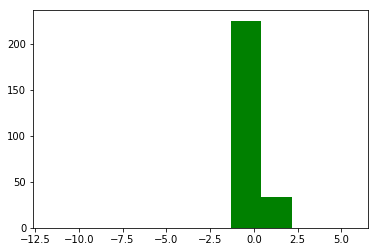

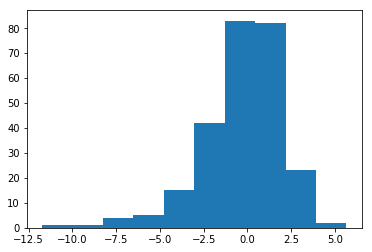

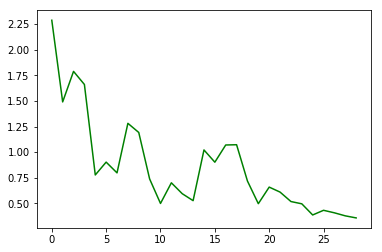

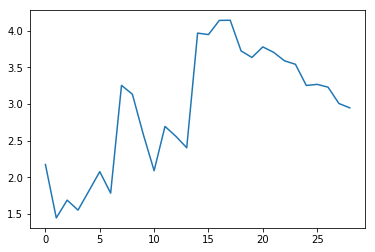

BS price:  [2.2871506]
Deep Hedge price: 2.1729061007499695
Epoch 0, Loss: 12.482
Unregularized Loss: 12.482
Validate Loss: 4.020


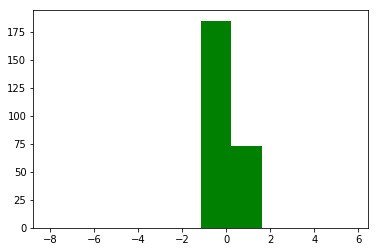

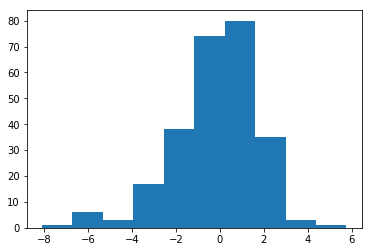

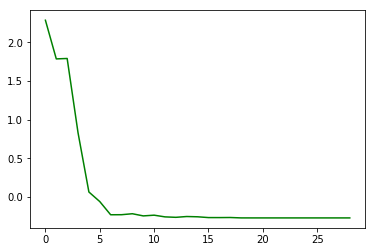

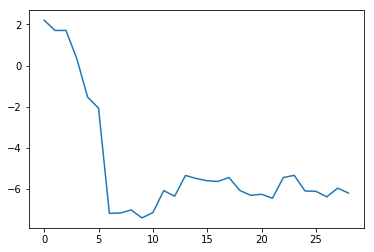

BS price:  [2.2871506]
Deep Hedge price: 2.203982323408127
Epoch 1, Loss: 3.661
Unregularized Loss: 3.661
Validate Loss: 3.299


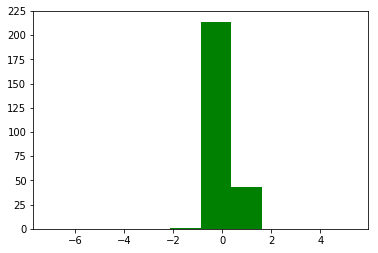

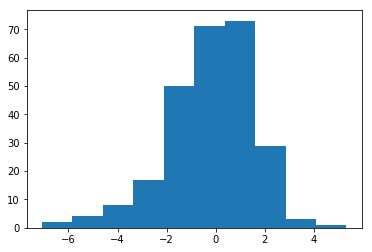

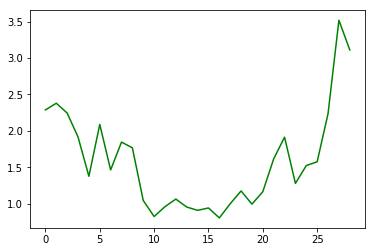

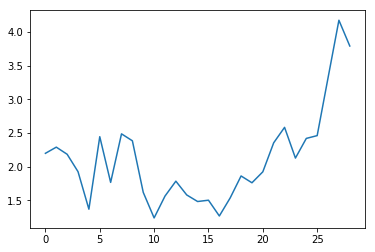

BS price:  [2.2871506]
Deep Hedge price: 2.197788804769516
Epoch 2, Loss: 3.055
Unregularized Loss: 3.055
Validate Loss: 2.770


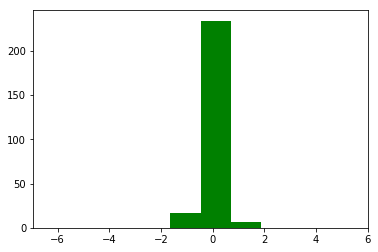

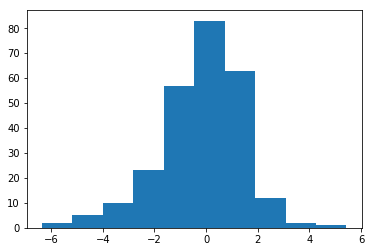

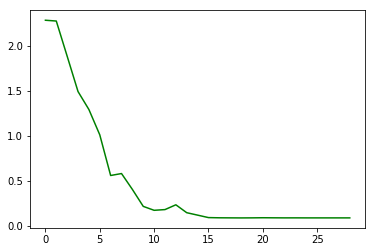

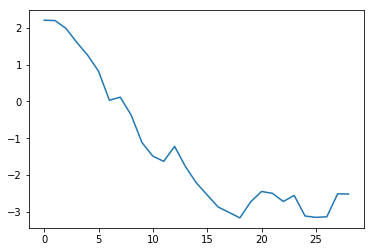

BS price:  [2.2871506]
Deep Hedge price: 2.202514559030533
Epoch 3, Loss: 2.600
Unregularized Loss: 2.600
Validate Loss: 2.367


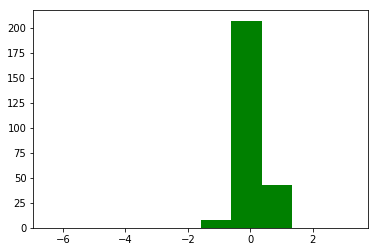

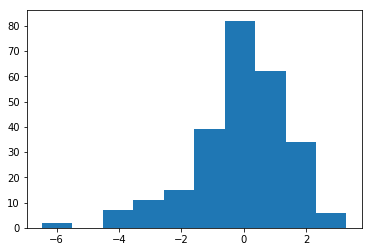

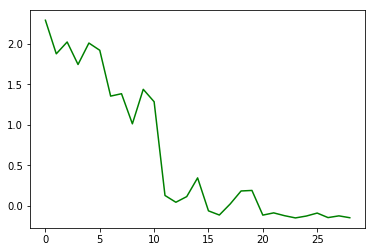

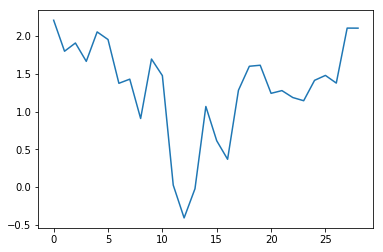

BS price:  [2.2871506]
Deep Hedge price: 2.209967076778412
Epoch 4, Loss: 2.266
Unregularized Loss: 2.266
Validate Loss: 2.107


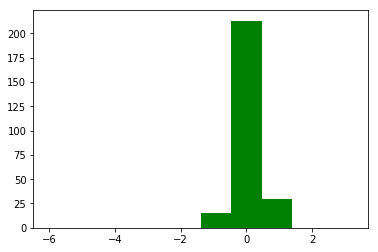

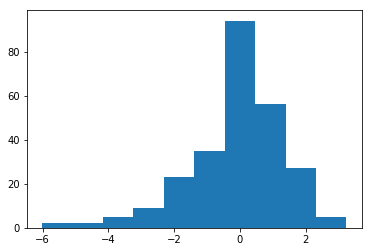

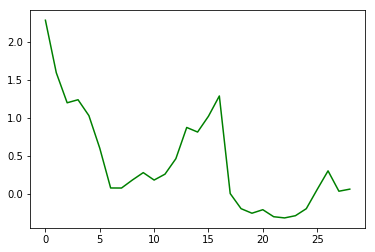

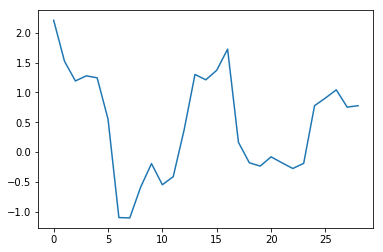

BS price:  [2.2871506]
Deep Hedge price: 2.207842767238617
Epoch 5, Loss: 1.996
Unregularized Loss: 1.996
Validate Loss: 1.822


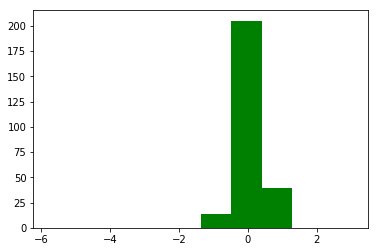

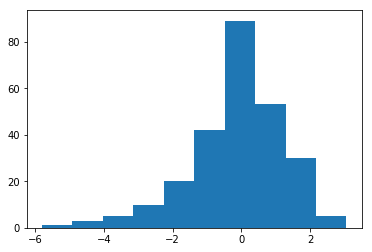

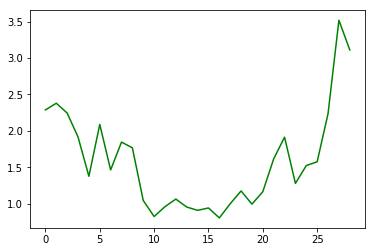

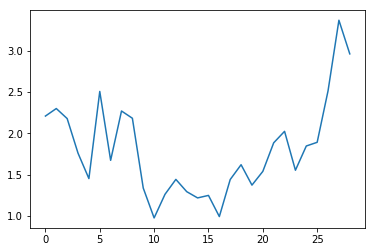

BS price:  [2.2871506]
Deep Hedge price: 2.209264785051346
Epoch 6, Loss: 1.764
Unregularized Loss: 1.764
Validate Loss: 1.665


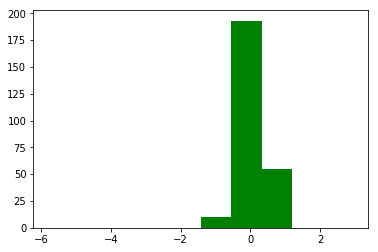

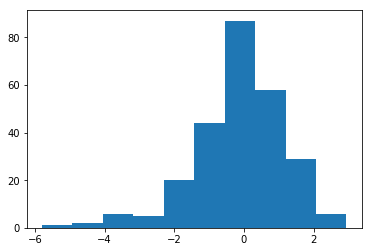

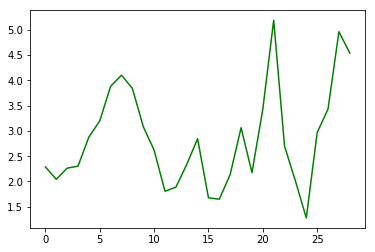

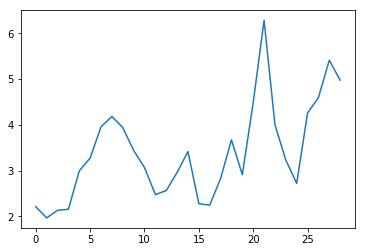

BS price:  [2.2871506]
Deep Hedge price: 2.207951098680496
Epoch 7, Loss: 1.567
Unregularized Loss: 1.567
Validate Loss: 1.446


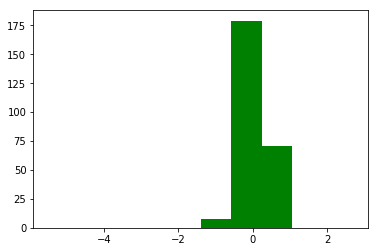

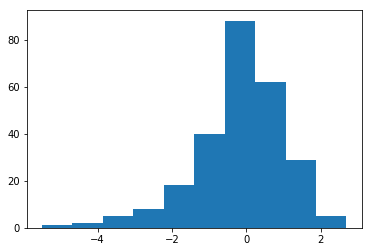

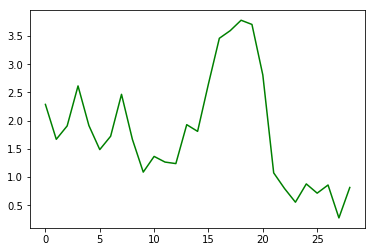

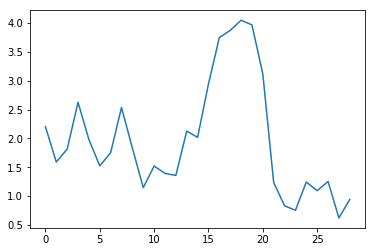

BS price:  [2.2871506]
Deep Hedge price: 2.2038696706295013
Epoch 8, Loss: 1.340
Unregularized Loss: 1.340
Validate Loss: 1.315


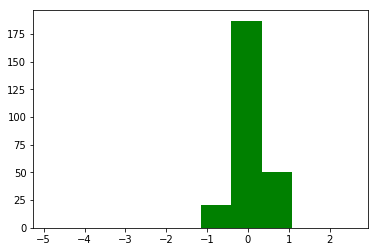

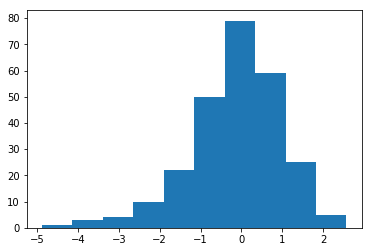

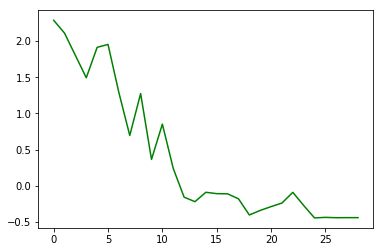

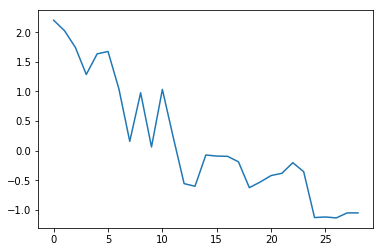

BS price:  [2.2871506]
Deep Hedge price: 2.2042720019817352
Epoch 9, Loss: 1.129
Unregularized Loss: 1.129
Validate Loss: 1.077


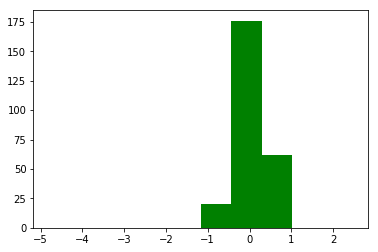

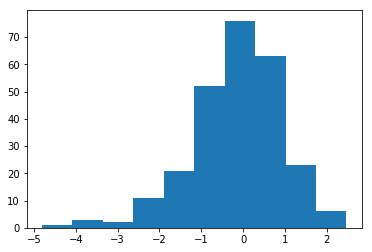

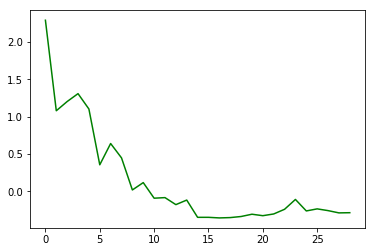

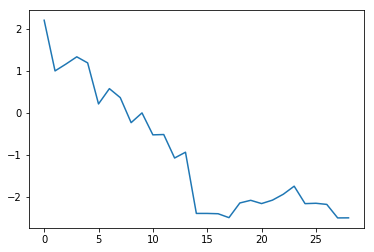

BS price:  [2.2871506]
Deep Hedge price: 2.203870266675949
Epoch 10, Loss: 0.981
Unregularized Loss: 0.981
Validate Loss: 0.931


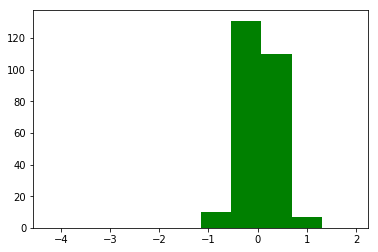

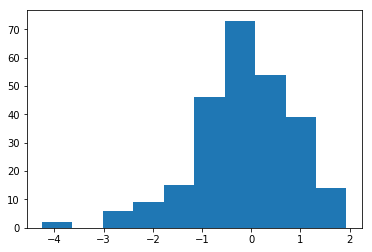

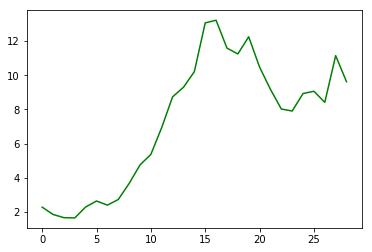

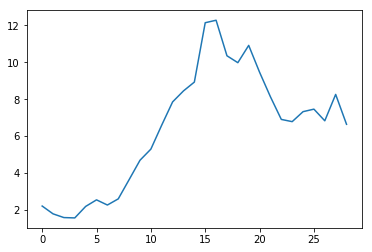

BS price:  [2.2871506]
Deep Hedge price: 2.203322649002075
Epoch 11, Loss: 0.863
Unregularized Loss: 0.863
Validate Loss: 0.795


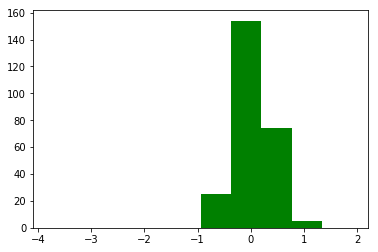

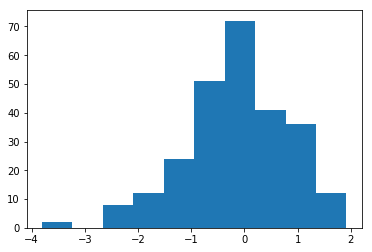

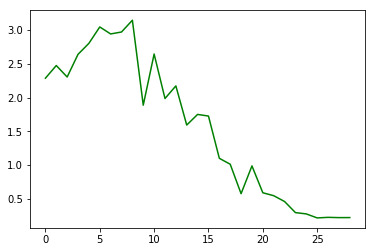

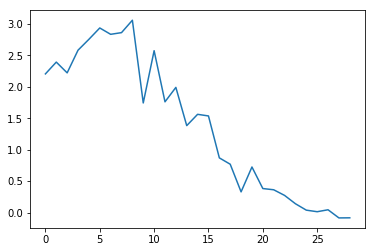

BS price:  [2.2871506]
Deep Hedge price: 2.2026705741882324
Epoch 12, Loss: 0.765
Unregularized Loss: 0.765
Validate Loss: 0.734


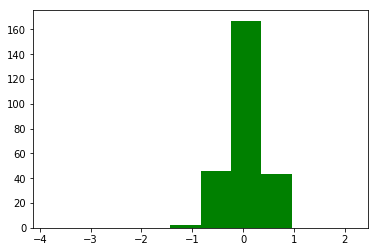

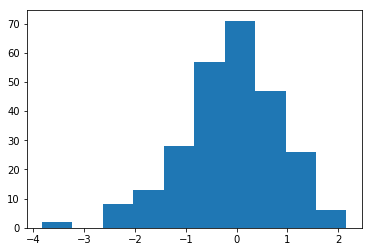

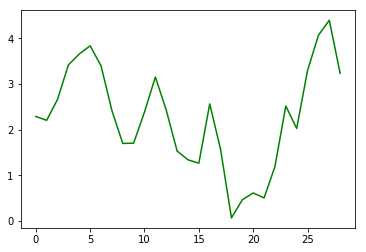

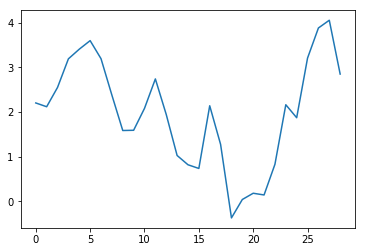

BS price:  [2.2871506]
Deep Hedge price: 2.2046495974063873
Epoch 13, Loss: 0.732
Unregularized Loss: 0.732
Validate Loss: 0.709


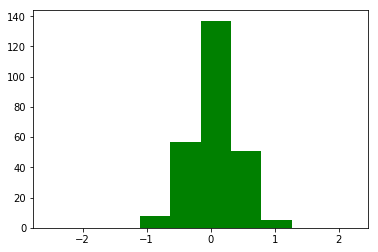

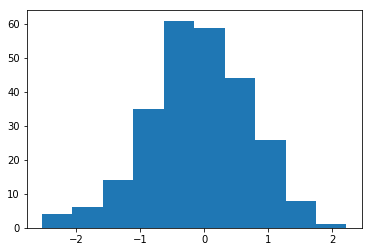

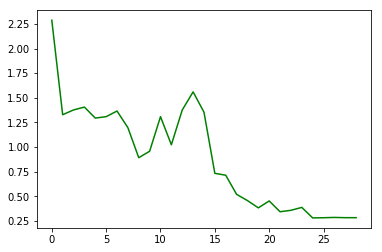

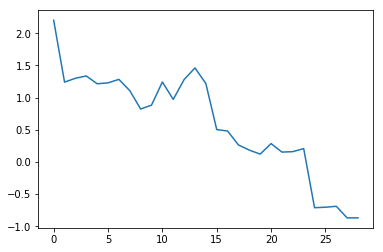

BS price:  [2.2871506]
Deep Hedge price: 2.2029629349708557
Epoch 14, Loss: 0.679
Unregularized Loss: 0.679
Validate Loss: 0.548


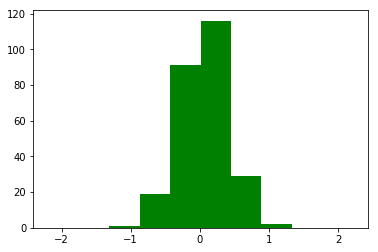

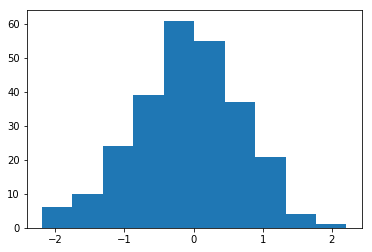

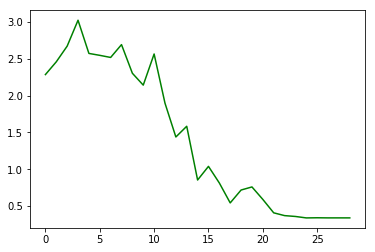

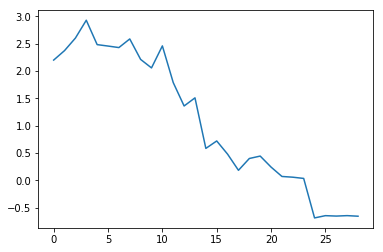

BS price:  [2.2871506]
Deep Hedge price: 2.2014255821704865
Epoch 15, Loss: 0.501
Unregularized Loss: 0.501
Validate Loss: 0.476


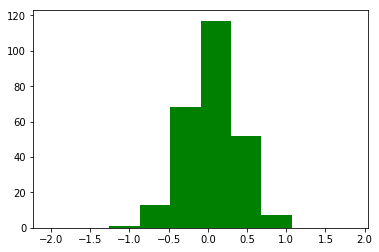

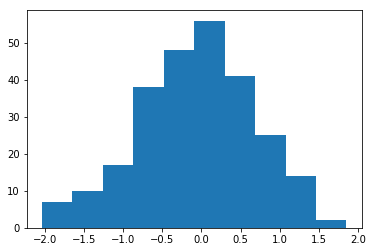

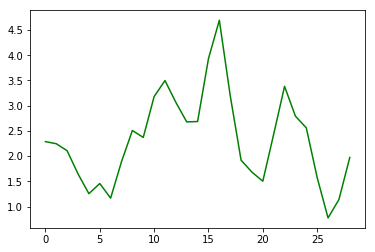

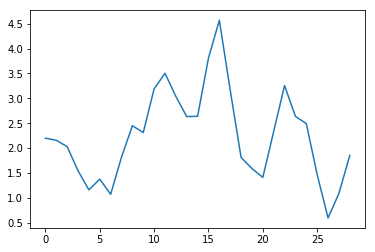

BS price:  [2.2871506]
Deep Hedge price: 2.199166864156723
Epoch 16, Loss: 0.465
Unregularized Loss: 0.465
Validate Loss: 0.457


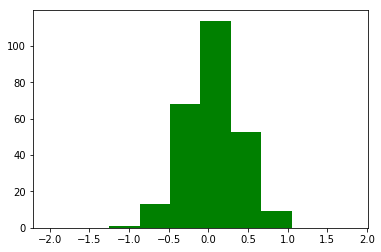

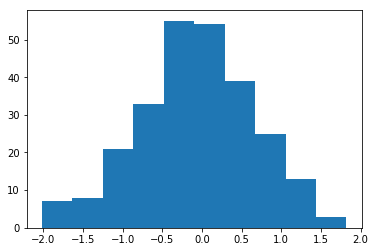

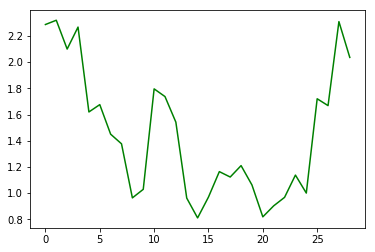

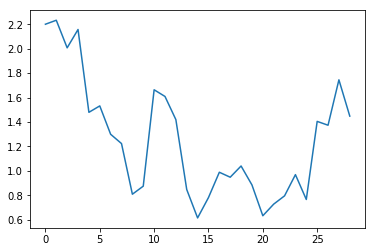

BS price:  [2.2871506]
Deep Hedge price: 2.1994291245937347
Epoch 17, Loss: 0.453
Unregularized Loss: 0.453
Validate Loss: 0.448


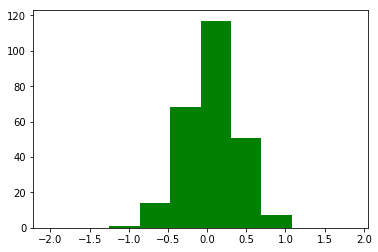

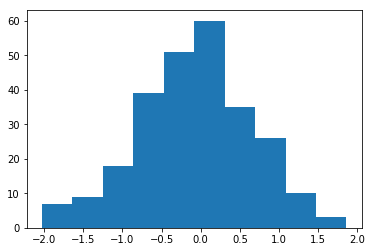

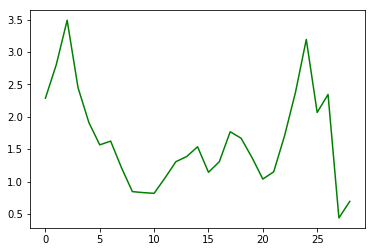

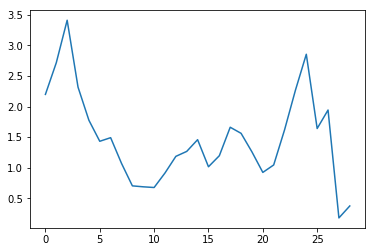

BS price:  [2.2871506]
Deep Hedge price: 2.1985286474227905
Epoch 18, Loss: 0.447
Unregularized Loss: 0.447
Validate Loss: 0.441


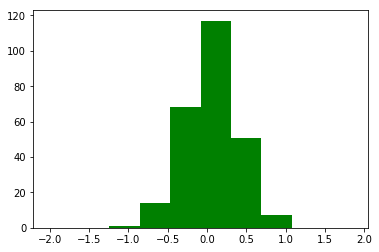

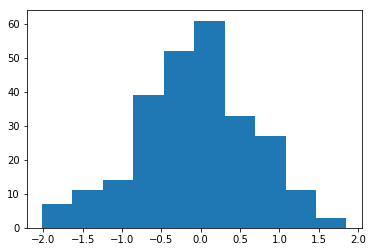

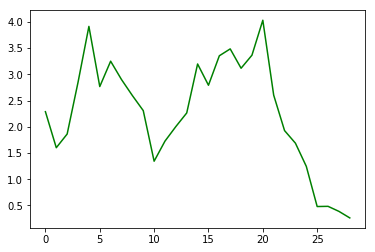

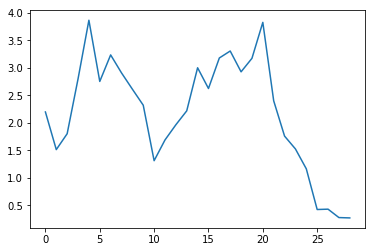

BS price:  [2.2871506]
Deep Hedge price: 2.198183238506317
Epoch 19, Loss: 0.442
Unregularized Loss: 0.442
Validate Loss: 0.435


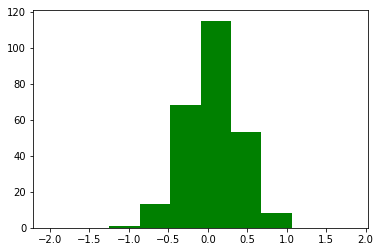

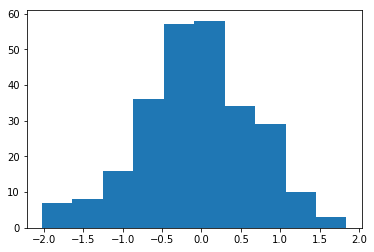

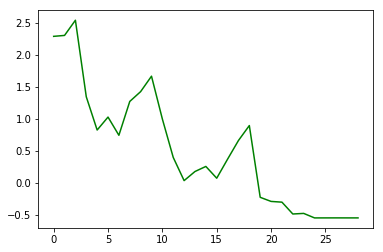

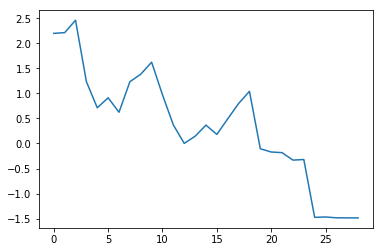

BS price:  [2.2871506]
Deep Hedge price: 2.198328971862793
Epoch 20, Loss: 0.440
Unregularized Loss: 0.440
Validate Loss: 0.436


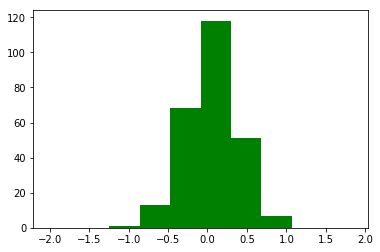

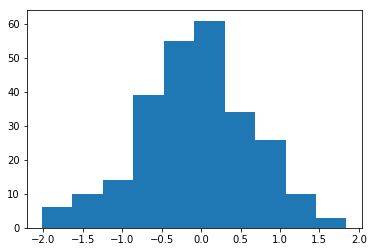

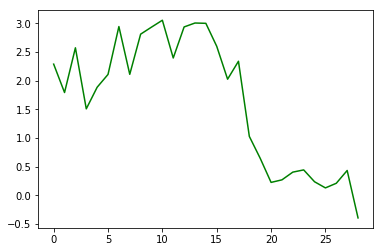

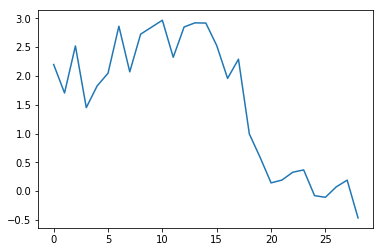

BS price:  [2.2871506]
Deep Hedge price: 2.19819113612175
Epoch 21, Loss: 0.438
Unregularized Loss: 0.438
Validate Loss: 0.433


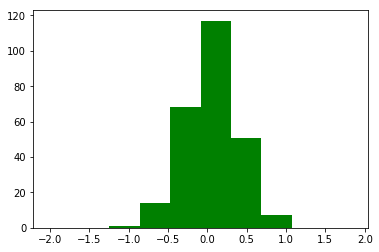

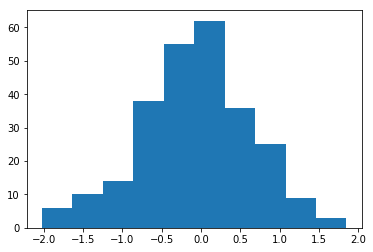

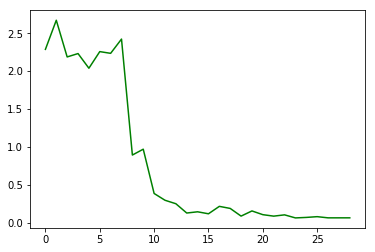

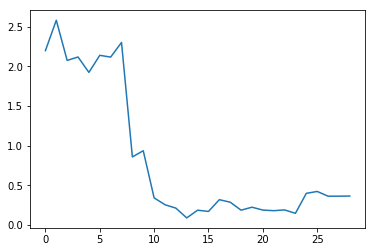

BS price:  [2.2871506]
Deep Hedge price: 2.1980053186416626
Epoch 22, Loss: 0.437
Unregularized Loss: 0.437
Validate Loss: 0.431


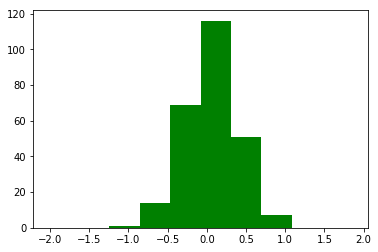

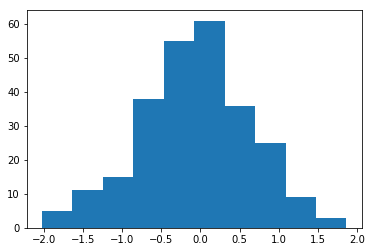

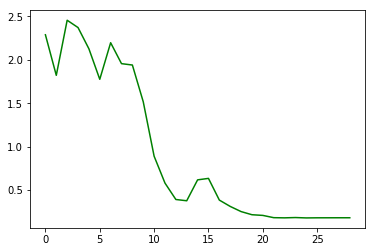

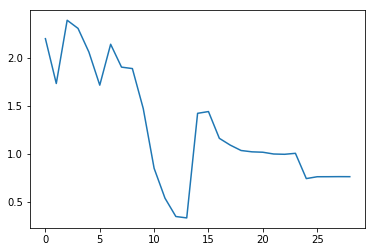

BS price:  [2.2871506]
Deep Hedge price: 2.197982221841812
Epoch 23, Loss: 0.436
Unregularized Loss: 0.436
Validate Loss: 0.429


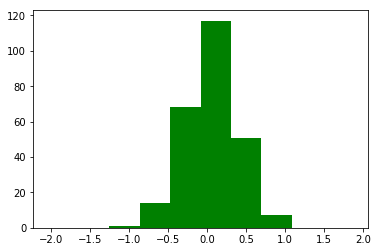

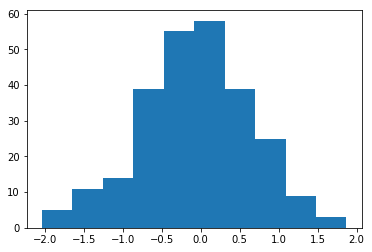

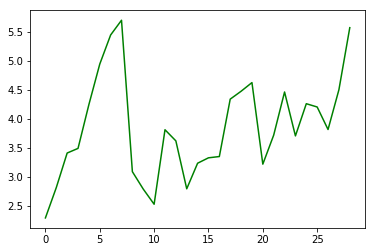

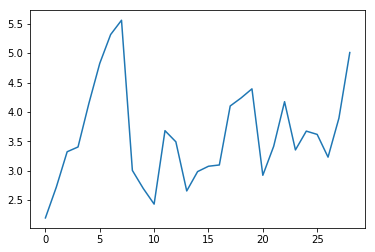

BS price:  [2.2871506]
Deep Hedge price: 2.1980978548526764
Epoch 24, Loss: 0.436
Unregularized Loss: 0.436
Validate Loss: 0.428


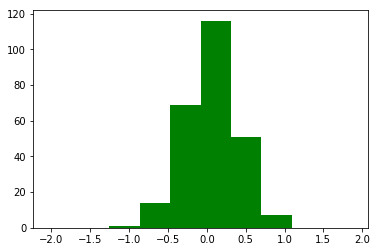

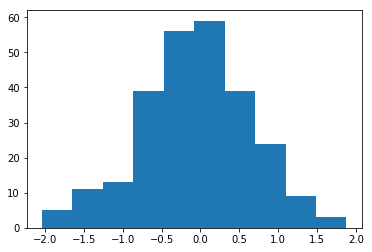

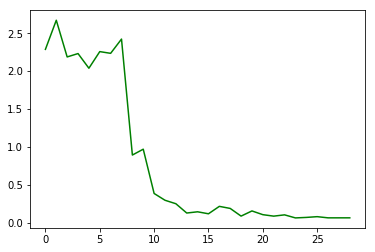

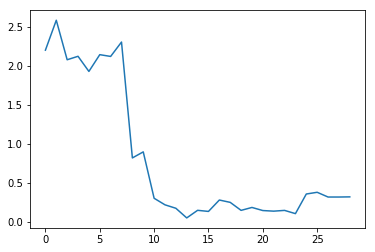

BS price:  [2.2871506]
Deep Hedge price: 2.198011726140976
Epoch 25, Loss: 0.435
Unregularized Loss: 0.435
Validate Loss: 0.427


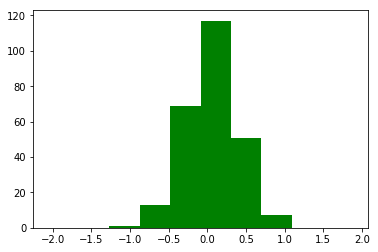

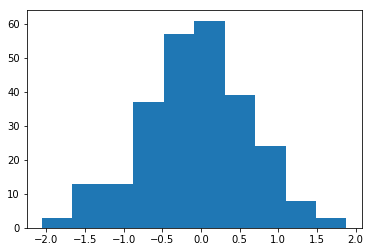

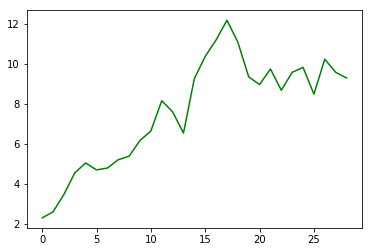

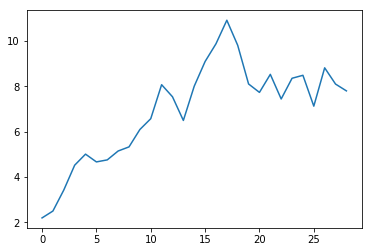

BS price:  [2.2871506]
Deep Hedge price: 2.1979403495788574
Epoch 26, Loss: 0.435
Unregularized Loss: 0.435
Validate Loss: 0.427


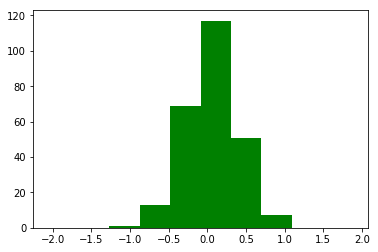

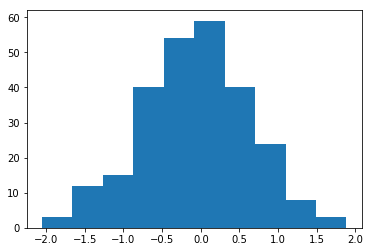

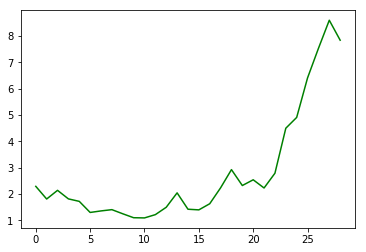

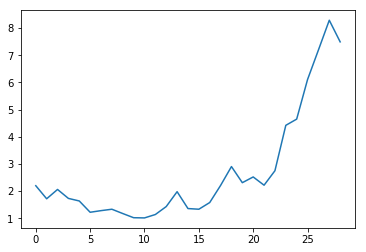

BS price:  [2.2871506]
Deep Hedge price: 2.198023945093155
Epoch 27, Loss: 0.434
Unregularized Loss: 0.434
Validate Loss: 0.431


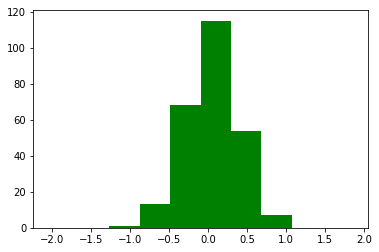

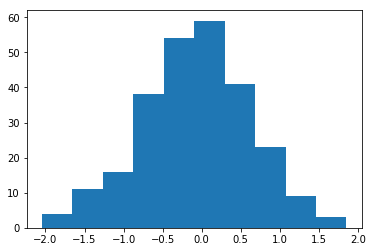

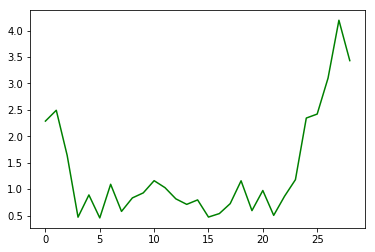

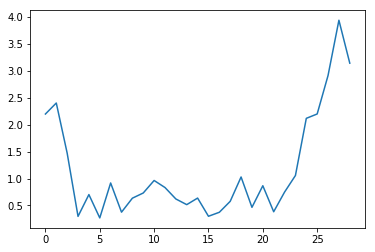

BS price:  [2.2871506]
Deep Hedge price: 2.19827339053154
Epoch 28, Loss: 0.433
Unregularized Loss: 0.433
Validate Loss: 0.428


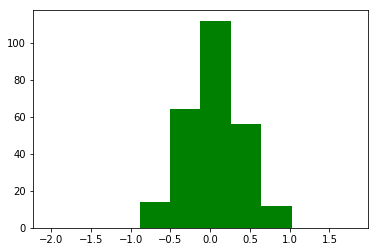

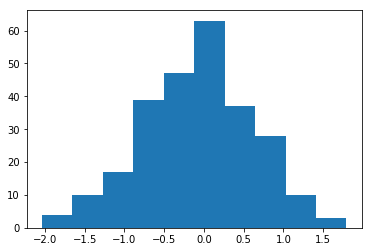

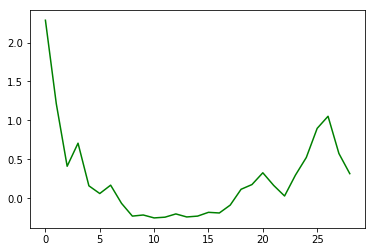

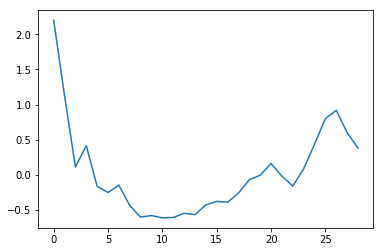

BS price:  [2.2871506]
Deep Hedge price: 2.198563665151596
Epoch 29, Loss: 0.430
Unregularized Loss: 0.430
Validate Loss: 0.427


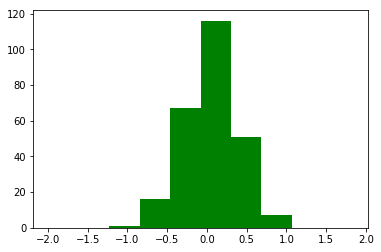

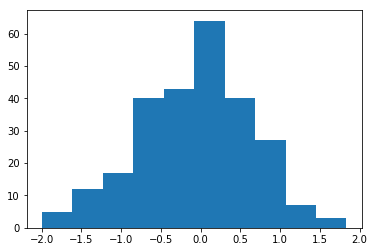

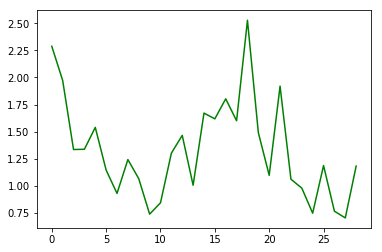

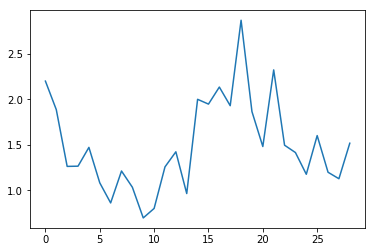

BS price:  [2.2871506]
Deep Hedge price: 2.200251668691635
Epoch 30, Loss: 0.423
Unregularized Loss: 0.423
Validate Loss: 0.427


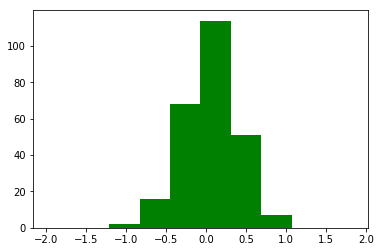

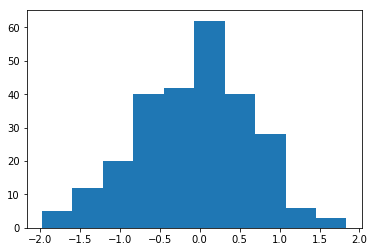

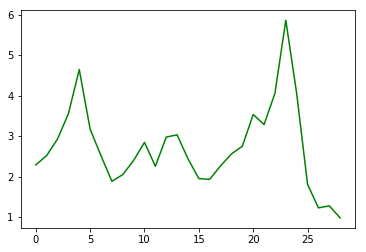

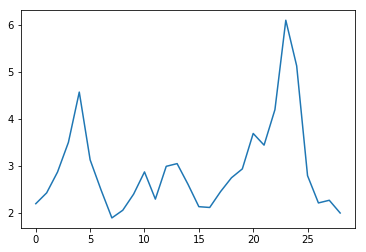

BS price:  [2.2871506]
Deep Hedge price: 2.2004279494285583
Epoch 31, Loss: 0.420
Unregularized Loss: 0.420
Validate Loss: 0.427


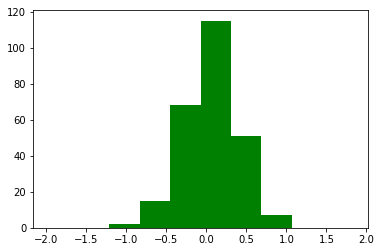

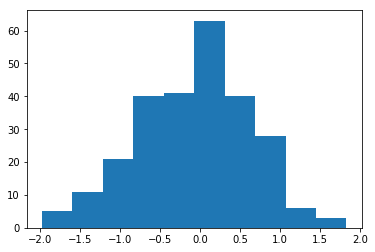

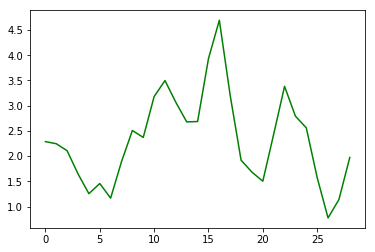

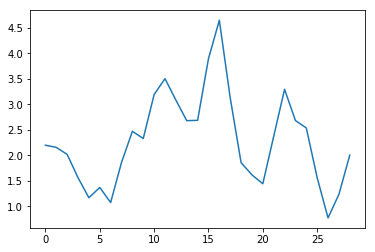

BS price:  [2.2871506]
Deep Hedge price: 2.200448662042618
Epoch 32, Loss: 0.419
Unregularized Loss: 0.419
Validate Loss: 0.422


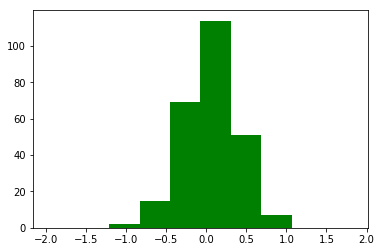

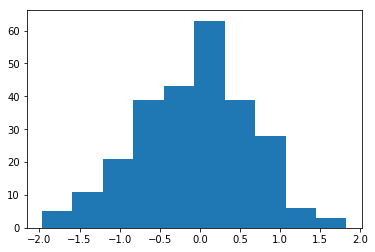

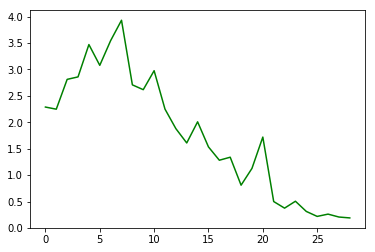

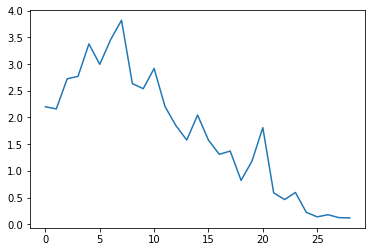

BS price:  [2.2871506]
Deep Hedge price: 2.2003985941410065
Epoch 33, Loss: 0.419
Unregularized Loss: 0.419
Validate Loss: 0.421


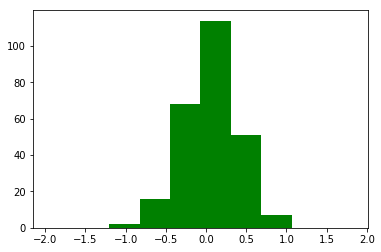

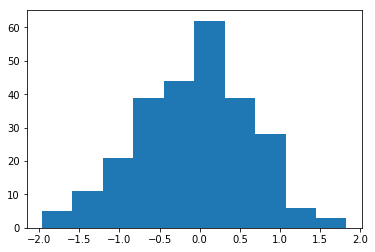

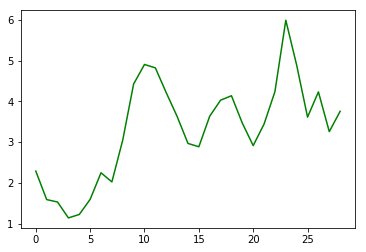

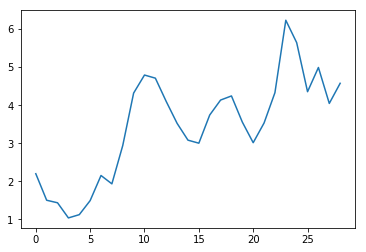

BS price:  [2.2871506]
Deep Hedge price: 2.200426757335663
Epoch 34, Loss: 0.419
Unregularized Loss: 0.419
Validate Loss: 0.427


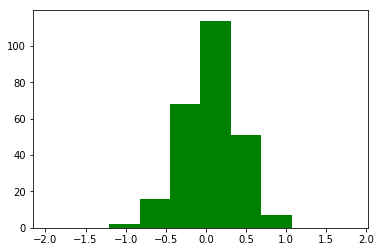

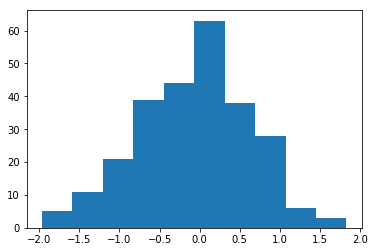

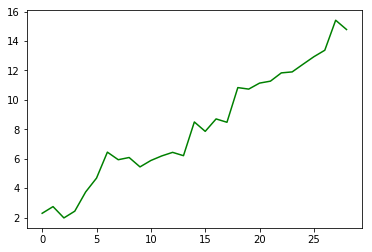

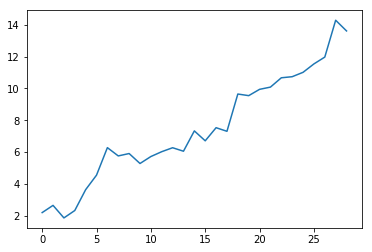

BS price:  [2.2871506]
Deep Hedge price: 2.200474292039871
Epoch 35, Loss: 0.419
Unregularized Loss: 0.419
Validate Loss: 0.422


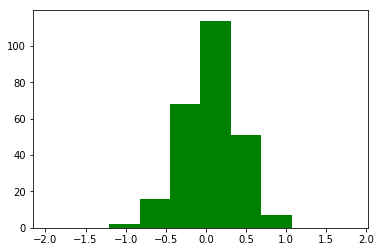

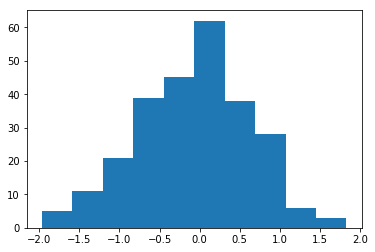

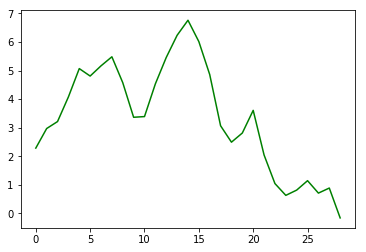

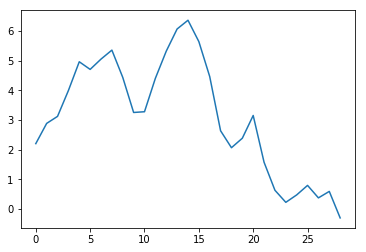

BS price:  [2.2871506]
Deep Hedge price: 2.2006018459796906
Epoch 36, Loss: 0.419
Unregularized Loss: 0.419
Validate Loss: 0.425


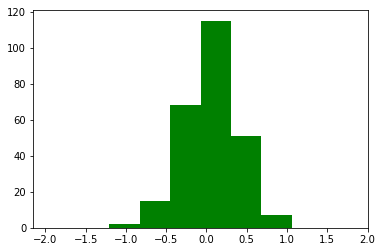

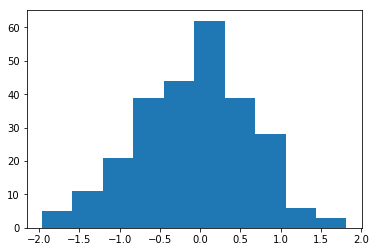

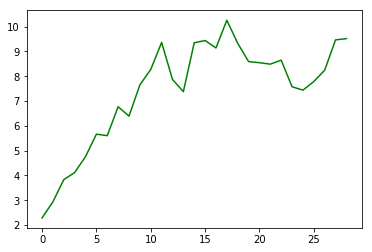

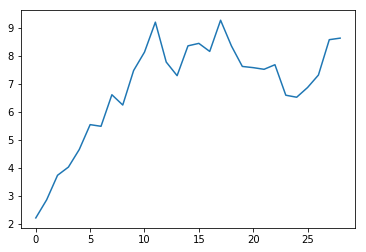

BS price:  [2.2871506]
Deep Hedge price: 2.2005370259284973
Epoch 37, Loss: 0.419
Unregularized Loss: 0.419
Validate Loss: 0.428


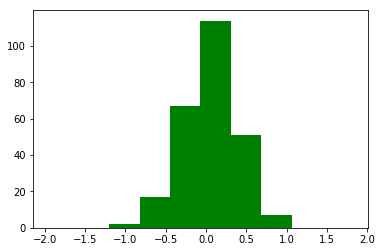

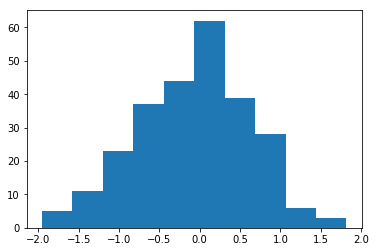

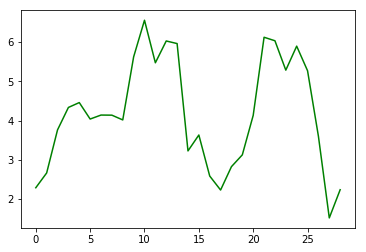

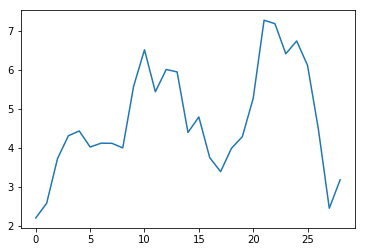

BS price:  [2.2871506]
Deep Hedge price: 2.2006164491176605
Epoch 38, Loss: 0.419
Unregularized Loss: 0.419
Validate Loss: 0.424


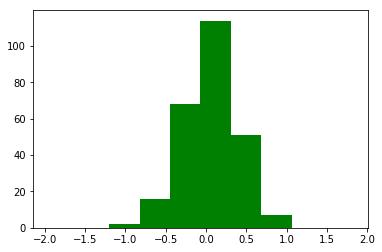

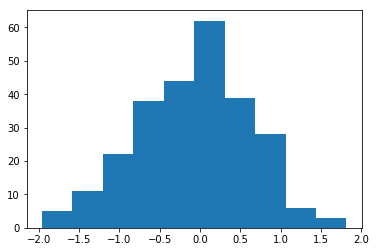

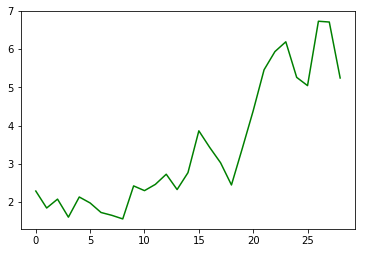

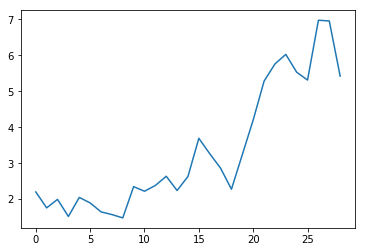

BS price:  [2.2871506]
Deep Hedge price: 2.2006314992904663
Epoch 39, Loss: 0.419
Unregularized Loss: 0.419
Validate Loss: 0.427
Loss on Test Data (unstopped): 0.422
INFO:tensorflow:Restoring parameters from ./model/my-test-model
Loss on Test Data (stopped): 0.417
Runtime (in sec): 1969.434


In [10]:
#if __name__ == '__main__':
FLAGS = parameters()
#Generate Correlation Matrix
if FLAGS.correlated:
    FLAGS.corr = corr(FLAGS.NUM_ASSETS)
#Generate Data
train_data = generate_data(FLAGS)
FLAGS.data = train_data
X_valid, y_valid = generate_validation_data(FLAGS)
X_test, y_test = generate_test_data(FLAGS)
EarlyTrainLoss =np.zeros(FLAGS.NUM_EPOCHS)
EarlyValidateLoss =np.zeros(FLAGS.NUM_EPOCHS)

with tf.Session() as sess:
    model = create_model(sess, FLAGS)
    saver = tf.train.Saver()
        
#########################
# Train Hedging Network #
#########################
    for idx, epoch in enumerate(generate_epochs(FLAGS)):
        training_losses = []
        quad_losses = []
        for step, (input_X, input_y) in enumerate(epoch):
            predictions, total_loss, quad_loss, after_loss, q = model.step(sess, input_X, input_y)
            training_losses.append(total_loss)
            quad_losses.append(quad_loss)
        model_weights = delta_BS(input_X,T = float(FLAGS.TIME_STEPS)/365.)
        model_weights = np.concatenate([model_weights[:,:,0:FLAGS.NUM_RELAVENT],np.zeros([FLAGS.BATCH_SIZE,FLAGS.TIME_STEPS-1,FLAGS.NUM_ASSETS-FLAGS.NUM_RELAVENT])], axis = 2)
        model_hedge_loss = q+HedgingLossNP(model_weights, input_y, input_X, q)
        deep_hedge_loss = HedgingLossNP(predictions, input_y, input_X, q)
        plt.hist(model_hedge_loss,range=(np.min(deep_hedge_loss),np.max(deep_hedge_loss)),color='green')
        plt.show()
        plt.hist(deep_hedge_loss)
        plt.show()
        i = np.random.randint(0,257,1)[0]
        model_hedge_loss_tra = q[i:i+1]+HedgingLossNPcum(model_weights[i:i+1,:,:], input_y[i:i+1,:], input_X[i:i+1,:,:], q[i:i+1])
        deep_hedge_loss_tra = HedgingLossNPcum(predictions[i:i+1,:,:], input_y[i:i+1,:], input_X[i:i+1,:,:], q[i:i+1])
        plt.plot(model_hedge_loss_tra[0,:],color='green')
        plt.show()
        plt.plot(deep_hedge_loss_tra[0,:])
        plt.show()
        print("BS price: ", q[i:i+1])
        print("Deep Hedge price:", deep_hedge_loss_tra[0,0])
        print("Epoch %i, Loss: %.3f" % (idx,np.mean(training_losses)))
        print("Unregularized Loss: %.3f" % (np.mean(quad_losses)))
        FLAGS.training = 2
        train_batch = model.sample_train(FLAGS)
        X_train, y_train = train_data
        test_weights = sess.run([train_batch],{model.X_train: X_train})
        FLAGS.training = 3
        p = price_valid(FLAGS)
        validate_graph = model.sample_validate(FLAGS)
        loss = QuadraticHedgingLoss(FLAGS, validate_graph,model.y_valid, model.X_valid, p)
        validate_loss,test_weights,certain_equivalent=sess.run([loss, validate_graph, model.q],{model.X_valid: X_valid,model.y_valid:np.squeeze(y_valid)})
        print("Validate Loss: %.3f" % (validate_loss))
        FLAGS.training = 1

        #Save Model for Early Stopping
        if validate_loss < FLAGS.minimal_loss:
            FLAGS.minimal_loss = validate_loss
            save_path = saver.save(sess, './model/my-test-model')
            
        EarlyTrainLoss[idx] = np.mean(training_losses)
        EarlyValidateLoss[idx] = validate_loss

    # Generate Batch Normalization Parameters for Testing
    FLAGS.training = 2
    train_batch = model.sample_train(FLAGS)
    X_train, y_train = train_data
    test_weights = sess.run([train_batch], {model.X_train: X_train})

    # Generate Predictions
    FLAGS.training = 3
    p = price_test(FLAGS)
    test_graph = model.sample(FLAGS)
    loss = QuadraticHedgingLoss(FLAGS, test_graph,model.y_test, model.X_test, p)
    test_loss, test_weights, certain_equivalent = sess.run([loss, test_graph, model.q],{model.X_test: X_test,model.y_test: np.squeeze(y_test)})
    print("Loss on Test Data (unstopped): %.3f" % (test_loss))
    p_np = (BlackScholes(100, T = float(FLAGS.TIME_STEPS)/365.) * FLAGS.NUM_RELAVENT)

#######################################
# Evaluate Network for Early Stopping #
#######################################
new_saver = tf.train.import_meta_graph('./model/my-test-model.meta', clear_devices=True)
with tf.Session() as sess1:
    # Generate Batch Normalization Parameters for Testing
    new_saver.restore(sess1,tf.train.latest_checkpoint('./model/'))
    FLAGS.training = 2
    train_batch = model.sample_train(FLAGS)
    X_train, y_train = train_data
    test_weights = sess1.run([train_batch],{model.X_train: X_train})
    
    # Generate Predictions
    FLAGS.training = 3
    p = price_test(FLAGS)
    test_graph = model.sample(FLAGS)
    loss = QuadraticHedgingLoss(FLAGS, test_graph,model.y_test, model.X_test, p)
    test_loss, test_weights, certain_equivalent = sess1.run([loss, test_graph, model.q],{model.X_test: X_test, model.y_test: np.squeeze(y_test)})
    print("Loss on Test Data (stopped): %.3f" % (test_loss))

# Print Runtime 
t1 = time.time()
total_time=t1-t0
print("Runtime (in sec): %.3f" % (total_time))

In [24]:
################
# Save Results #
################

np.save('deep_weights', test_weights)
deep_hedge_loss = HedgingLossNP(test_weights, y_test, X_test, p_np)
model_weights = delta_BS(X_test,T = float(FLAGS.TIME_STEPS)/365.)
#model_weights = np.concatenate([model_weights[:,:,0:FLAGS.NUM_RELAVENT],np.zeros([FLAGS.NUM_TEST,FLAGS.TIME_STEPS-1,FLAGS.NUM_ASSETS-FLAGS.NUM_RELAVENT])], axis = 2)
if FLAGS.NUM_ASSETS-FLAGS.NUM_RELAVENT != 0:
    model_weights = np.concatenate(
        [model_weights[:,:,0:FLAGS.NUM_RELAVENT],
        np.zeros([FLAGS.NUM_TEST,FLAGS.TIME_STEPS-1,
        FLAGS.NUM_ASSETS-FLAGS.NUM_RELAVENT])], axis = 2)
np.save('model_weights', model_weights)
model_hedge_loss = HedgingLossNP(model_weights, y_test, X_test, p_np)+p_np
np.save('stock_prices', X_test)
df = pd.DataFrame(deep_hedge_loss)
df.to_csv('deep_hedge_loss.csv')
df = pd.DataFrame(model_hedge_loss)
df.to_csv('model_hedge_loss.csv')

In [25]:
stock_prices=np.load('stock_prices.npy')
model_hedge_loss = pd.read_csv('model_hedge_loss.csv')
deep_hedge_loss = pd.read_csv('deep_hedge_loss.csv')

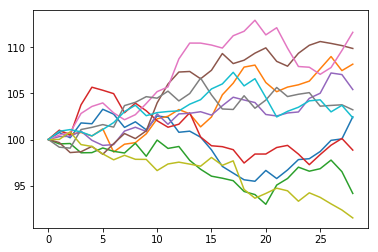

In [26]:
for i in range(10):
   plt.plot(stock_prices[i,1:,:])
plt.show()

In [27]:
model_hedge_loss.hist(column='0',color='green')
deep_hedge_loss.hist(column='0')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f86881748>]],
      dtype=object)

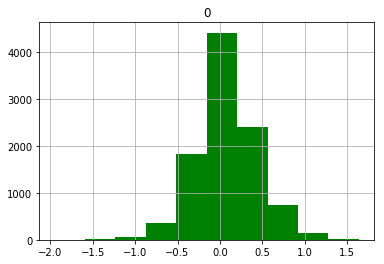

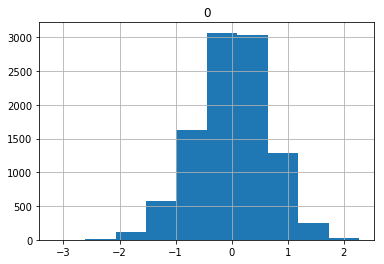

In [28]:
plt.show()

In [29]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = bytes("<stripped %d bytes>"%size, 'utf-8')#"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [30]:
#show_graph(tf.get_default_graph().as_graph_def())

In [31]:
weights=np.load('deep_weights.npy')

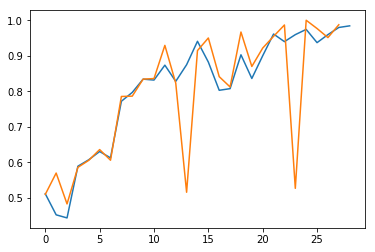

In [32]:
S = stock_prices[7,1:,:]
S = S.T
delta = delta_BS(S, sigma = 0.2, K = 100., r = 0., T =30./365.)
plt.plot(delta[0])
plt.plot(weights[7,1:])
plt.show()